In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import gdown

# Replace this with your Google Drive file ID
file_id = '1c676td85yOkEigIvgNhsLgLi5pc9grwm'
# Construct the Google Drive URL https://drive.google.com/file/d/1c676td85yOkEigIvgNhsLgLi5pc9grwm/view?usp=sharing
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the output file path (optional)
output_path = 'exoplanet_data.csv'

# Download the file
gdown.download(url, output_path, quiet=False)

print(f'File has been downloaded and saved as {output_path}')

Downloading...
From: https://drive.google.com/uc?id=1c676td85yOkEigIvgNhsLgLi5pc9grwm
To: /content/exoplanet_data.csv
100%|██████████| 26.0M/26.0M [00:00<00:00, 28.3MB/s]

File has been downloaded and saved as exoplanet_data.csv


In [3]:
# โหลดข้อมูลจากไฟล์ CSV
data = pd.read_csv('exoplanet_data.csv')

In [4]:
# แสดงข้อมูล 5 แถวแรก
print(data.head())

             Mp            Rp           Tp      logZ       C/O  Bessel u  \
0  4.464190e+27  1.015818e+08  2153.081345 -0.609493  0.433557  0.021994   
1  5.651705e+27  7.732184e+07  2316.096615  0.826968  0.663562  0.012685   
2  8.331068e+26  9.078680e+07  1433.649230  2.163437  0.399001  0.018675   
3  3.760491e+27  8.458685e+07  2122.254707 -0.511028  0.372936  0.015244   
4  3.869469e+27  5.730827e+07  2293.030426  1.286444  0.518019  0.006988   

   Bessel b  Bessel v  Bessel r  Bessel i   Sloan u   Sloan g   Sloan r  \
0  0.022014  0.022111  0.022135  0.022223  0.022024  0.022070  0.022107   
1  0.012710  0.012722       NaN  0.012763  0.012695  0.012727  0.012717   
2  0.019033  0.018863  0.018916  0.019086  0.018721  0.019061  0.018845   
3  0.015256  0.015324  0.015340  0.015398  0.015265  0.015293  0.015321   
4  0.007006  0.007007  0.007009  0.007028  0.006993  0.007014  0.007004   

    Sloan i   Sloan z  
0  0.022197  0.022200  
1  0.012751  0.012757  
2  0.019102  0.01891

In [5]:
# ตรวจสอบข้อมูลที่หายไป
print(data.isnull().sum())

Mp           0
Rp           8
Tp          20
logZ        21
C/O         31
Bessel u    39
Bessel b    57
Bessel v    59
Bessel r    40
Bessel i    57
Sloan u     49
Sloan g     58
Sloan r     39
Sloan i     23
Sloan z      2
dtype: int64


In [6]:
# ตรวจสอบข้อมูลที่หายไป
print(data.isnull().sum())

# จัดการข้อมูลที่หายไป (ลบแถวที่มีค่า missing)
data_clean = data.dropna()

# ตรวจสอบอีกครั้ง
print(data_clean.isnull().sum())

Mp           0
Rp           8
Tp          20
logZ        21
C/O         31
Bessel u    39
Bessel b    57
Bessel v    59
Bessel r    40
Bessel i    57
Sloan u     49
Sloan g     58
Sloan r     39
Sloan i     23
Sloan z      2
dtype: int64
Mp          0
Rp          0
Tp          0
logZ        0
C/O         0
Bessel u    0
Bessel b    0
Bessel v    0
Bessel r    0
Bessel i    0
Sloan u     0
Sloan g     0
Sloan r     0
Sloan i     0
Sloan z     0
dtype: int64


In [7]:
print(data_clean.describe())

                 Mp            Rp            Tp          logZ           C/O  \
count  9.981600e+04  9.981600e+04  99816.000000  99816.000000  99816.000000   
mean   3.195963e+27  8.877180e+07   2136.590431      1.016506      0.674662   
std    1.454128e+27  2.195801e+07    487.321156      1.154587      0.187797   
min    5.694648e+26  5.102536e+07   1300.038232     -0.999991      0.350021   
25%    1.953185e+27  6.982455e+07   1714.118027      0.017364      0.512025   
50%    3.203132e+27  8.847600e+07   2130.818581      1.026944      0.675361   
75%    4.451437e+27  1.076361e+08   2553.428941      2.018544      0.837040   
max    5.694542e+27  1.275618e+08   2999.997009      2.999874      0.999990   

           Bessel u      Bessel b      Bessel v      Bessel r      Bessel i  \
count  99816.000000  99816.000000  99816.000000  99816.000000  99816.000000   
mean       0.018229      0.018391      0.018383      0.018372      0.018495   
std        0.008802      0.008922      0.008916    

In [8]:
# สถิติพื้นฐานของตัวแปรเป้าหมาย
print(data_clean[['Mp', 'Rp', 'Tp', 'logZ', 'C/O']].describe())

# สถิติพื้นฐานของ transit depth
transit_depth_cols = ['Bessel u', 'Bessel b', 'Bessel v', 'Bessel r', 'Bessel i',
                      'Sloan u', 'Sloan g', 'Sloan r', 'Sloan i', 'Sloan z']
print(data_clean[transit_depth_cols].describe())

                 Mp            Rp            Tp          logZ           C/O
count  9.981600e+04  9.981600e+04  99816.000000  99816.000000  99816.000000
mean   3.195963e+27  8.877180e+07   2136.590431      1.016506      0.674662
std    1.454128e+27  2.195801e+07    487.321156      1.154587      0.187797
min    5.694648e+26  5.102536e+07   1300.038232     -0.999991      0.350021
25%    1.953185e+27  6.982455e+07   1714.118027      0.017364      0.512025
50%    3.203132e+27  8.847600e+07   2130.818581      1.026944      0.675361
75%    4.451437e+27  1.076361e+08   2553.428941      2.018544      0.837040
max    5.694542e+27  1.275618e+08   2999.997009      2.999874      0.999990
           Bessel u      Bessel b      Bessel v      Bessel r      Bessel i  \
count  99816.000000  99816.000000  99816.000000  99816.000000  99816.000000   
mean       0.018229      0.018391      0.018383      0.018372      0.018495   
std        0.008802      0.008922      0.008916      0.008909      0.009002   


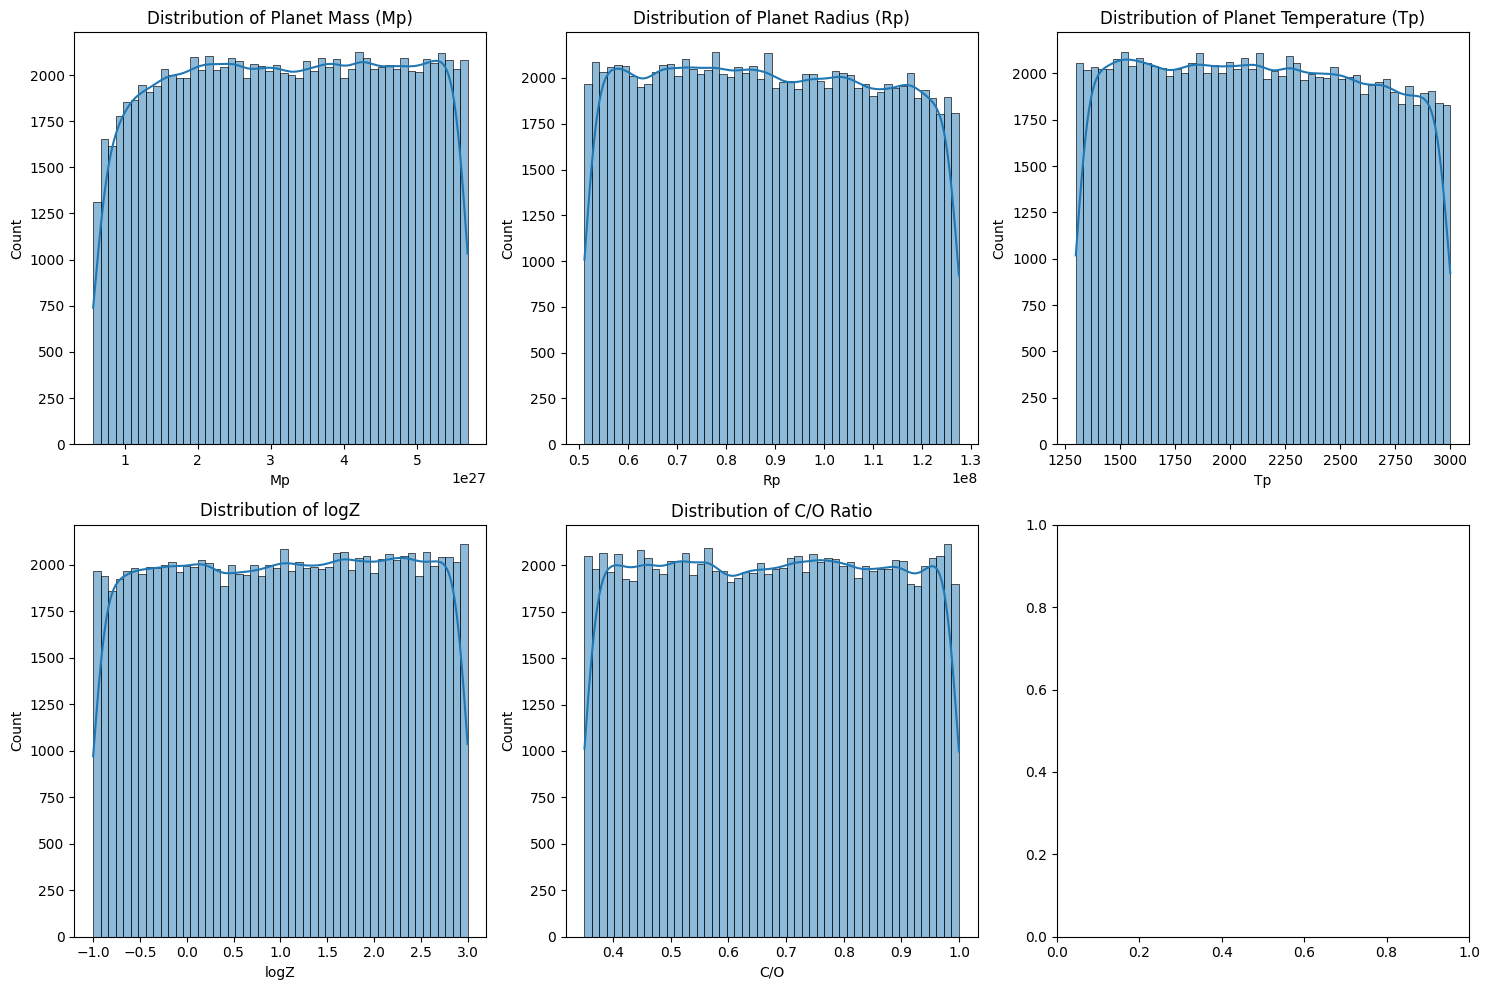

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# การกระจายตัวของตัวแปรเป้าหมาย
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
sns.histplot(data_clean['Mp'], ax=axes[0, 0], bins=50, kde=True)
axes[0, 0].set_title('Distribution of Planet Mass (Mp)')

sns.histplot(data_clean['Rp'], ax=axes[0, 1], bins=50, kde=True)
axes[0, 1].set_title('Distribution of Planet Radius (Rp)')

sns.histplot(data_clean['Tp'], ax=axes[0, 2], bins=50, kde=True)
axes[0, 2].set_title('Distribution of Planet Temperature (Tp)')

sns.histplot(data_clean['logZ'], ax=axes[1, 0], bins=50, kde=True)
axes[1, 0].set_title('Distribution of logZ')

sns.histplot(data_clean['C/O'], ax=axes[1, 1], bins=50, kde=True)
axes[1, 1].set_title('Distribution of C/O Ratio')

plt.tight_layout()
plt.show()

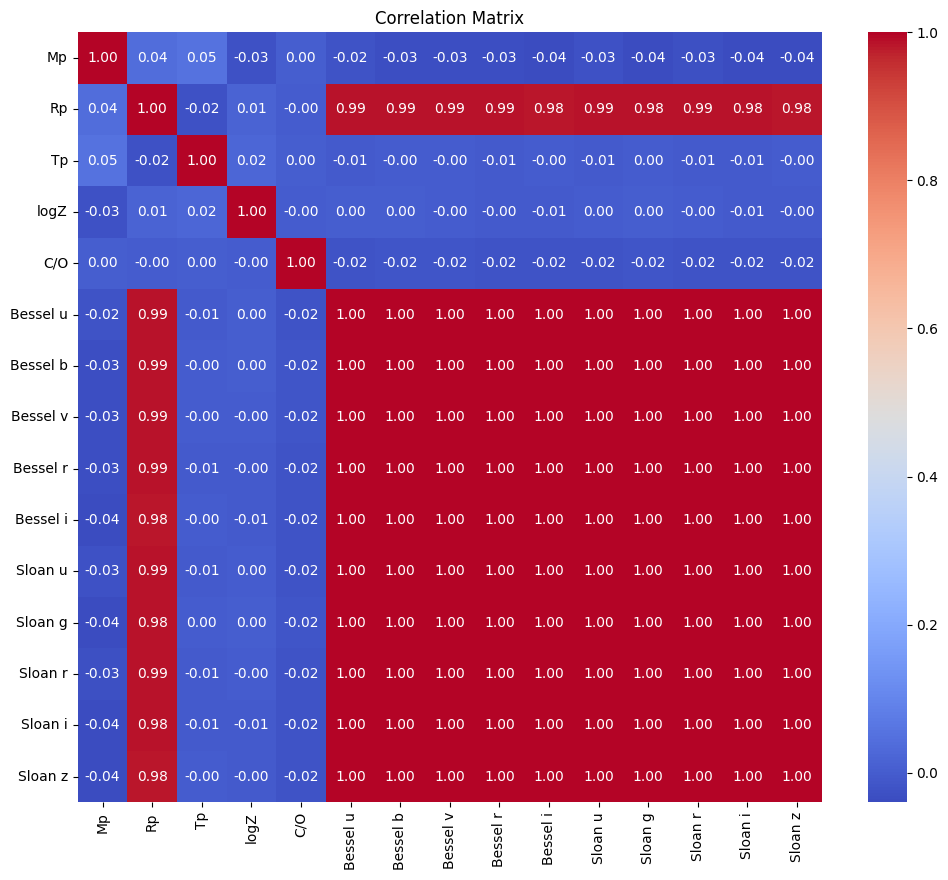

In [10]:
# สร้าง heatmap ของ correlation matrix
corr_matrix = data_clean.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

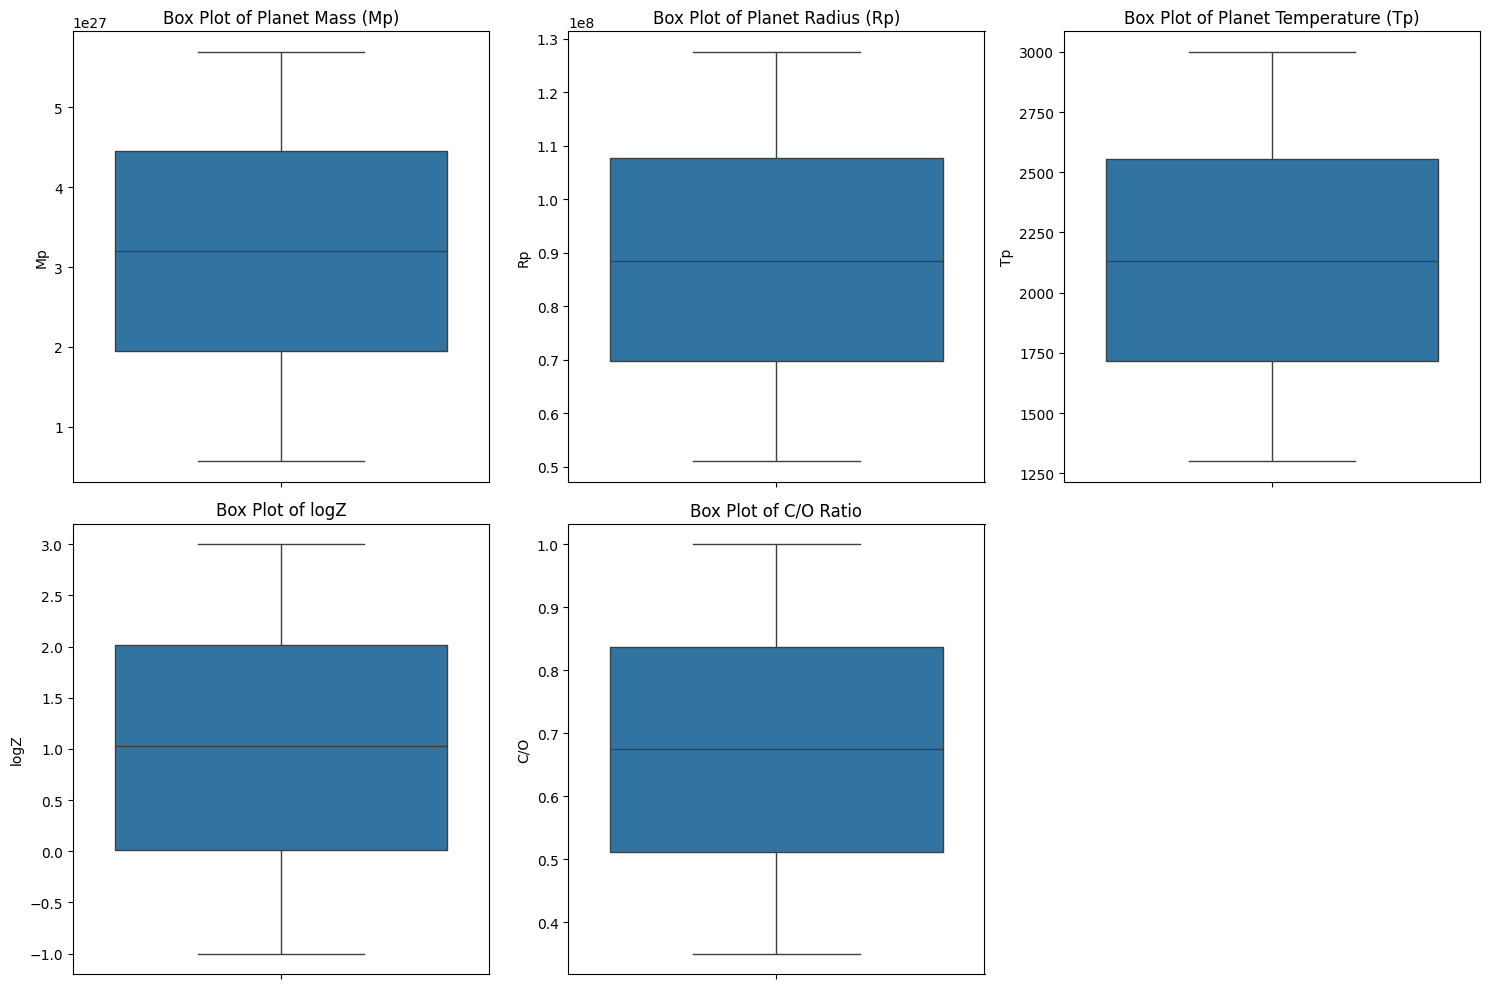

In [11]:
# พล็อต Box Plot สำหรับตัวแปรเป้าหมาย
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.boxplot(y=data_clean['Mp'], ax=axes[0, 0])
axes[0, 0].set_title('Box Plot of Planet Mass (Mp)')

sns.boxplot(y=data_clean['Rp'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Planet Radius (Rp)')

sns.boxplot(y=data_clean['Tp'], ax=axes[0, 2])
axes[0, 2].set_title('Box Plot of Planet Temperature (Tp)')

sns.boxplot(y=data_clean['logZ'], ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of logZ')

sns.boxplot(y=data_clean['C/O'], ax=axes[1, 1])
axes[1, 1].set_title('Box Plot of C/O Ratio')

axes[1, 2].axis('off')  # ไม่มีกราฟในตำแหน่งนี้

plt.tight_layout()
plt.show()


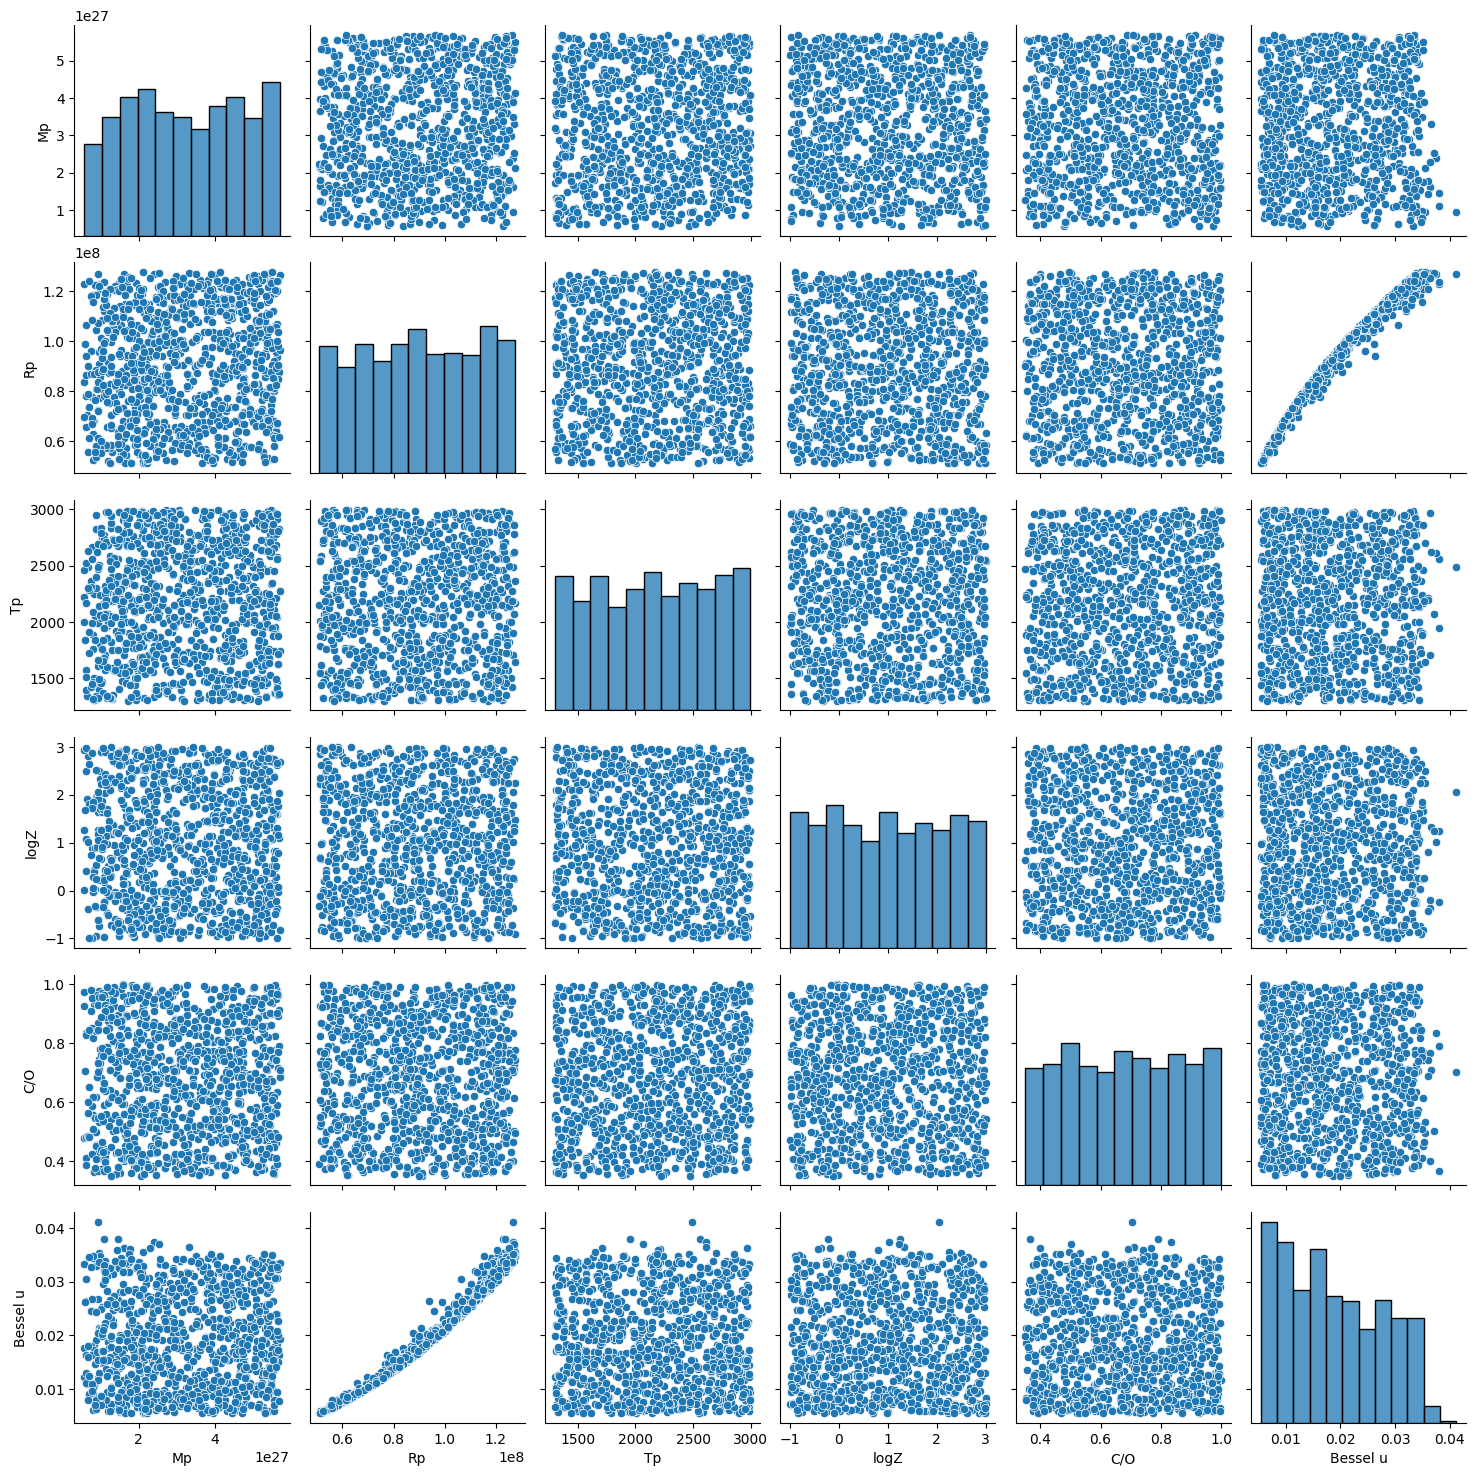

In [12]:
# สุ่มตัวอย่างข้อมูลบางส่วนเพื่อให้การพล็อตเร็วขึ้น
sample_data = data_clean.sample(n=1000, random_state=42)
target_vars = ['Mp', 'Rp', 'Tp', 'logZ', 'C/O']
sns.pairplot(sample_data[target_vars + ['Bessel u']])
plt.show()


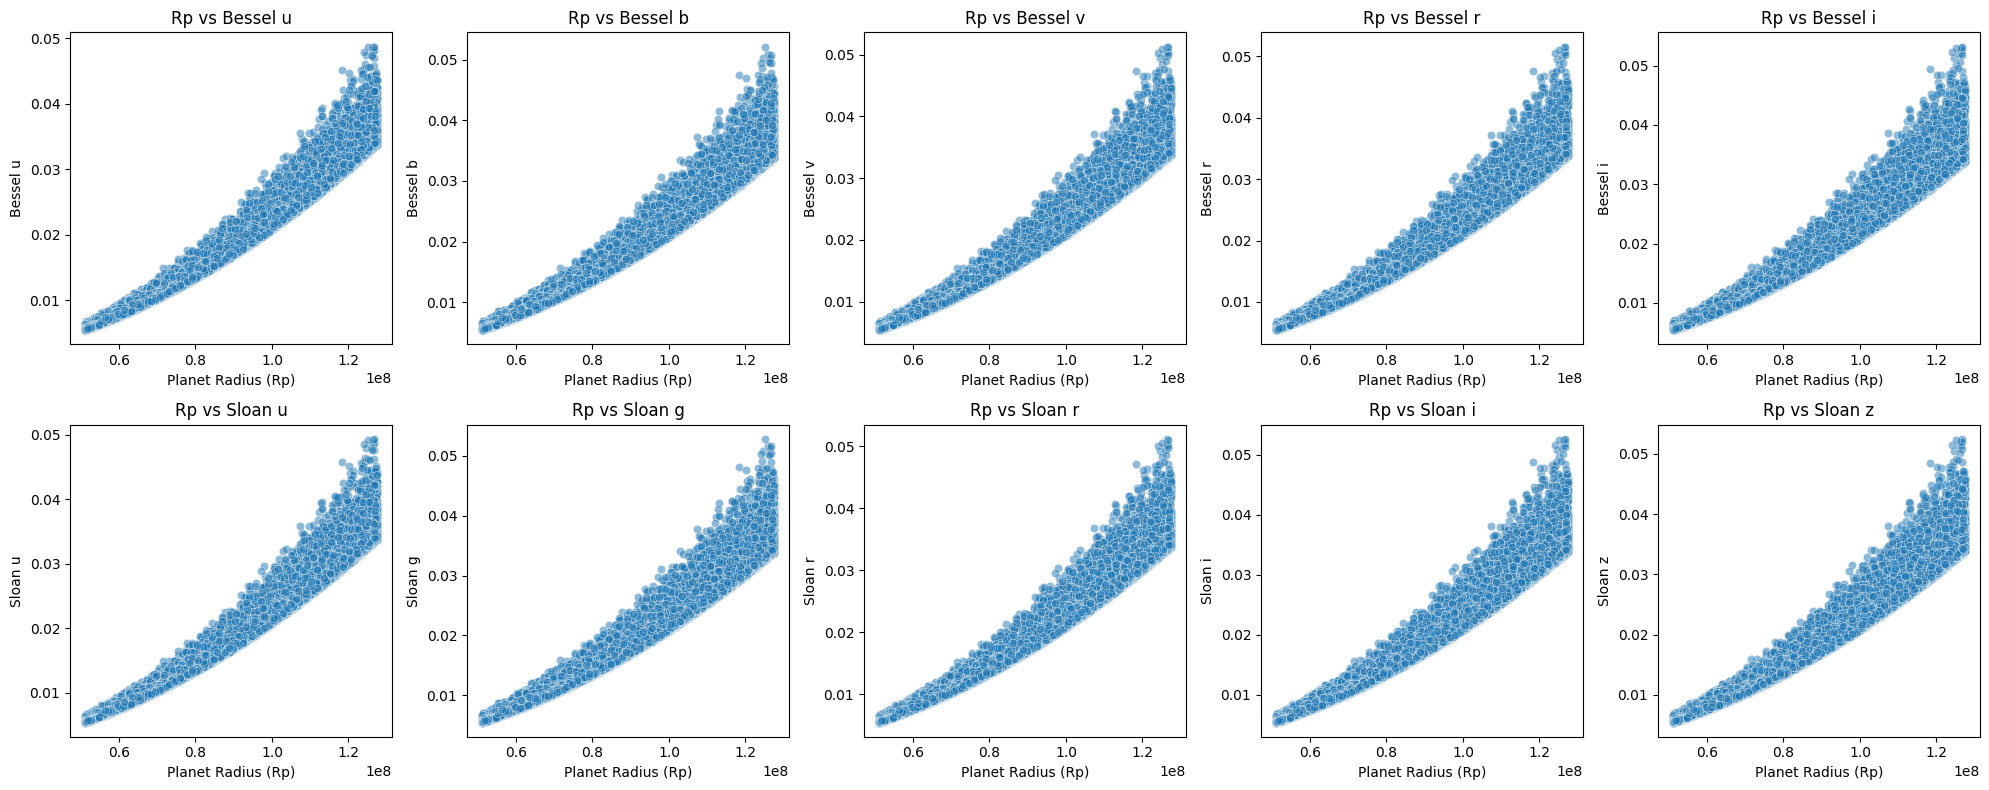

In [13]:
# พล็อตความสัมพันธ์ระหว่าง Rp และ transit depth ในแต่ละฟิลเตอร์
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, col in enumerate(transit_depth_cols):
    sns.scatterplot(x=data_clean['Rp'], y=data_clean[col], ax=axes[idx], alpha=0.5)
    axes[idx].set_xlabel('Planet Radius (Rp)')
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'Rp vs {col}')

plt.tight_layout()
plt.show()


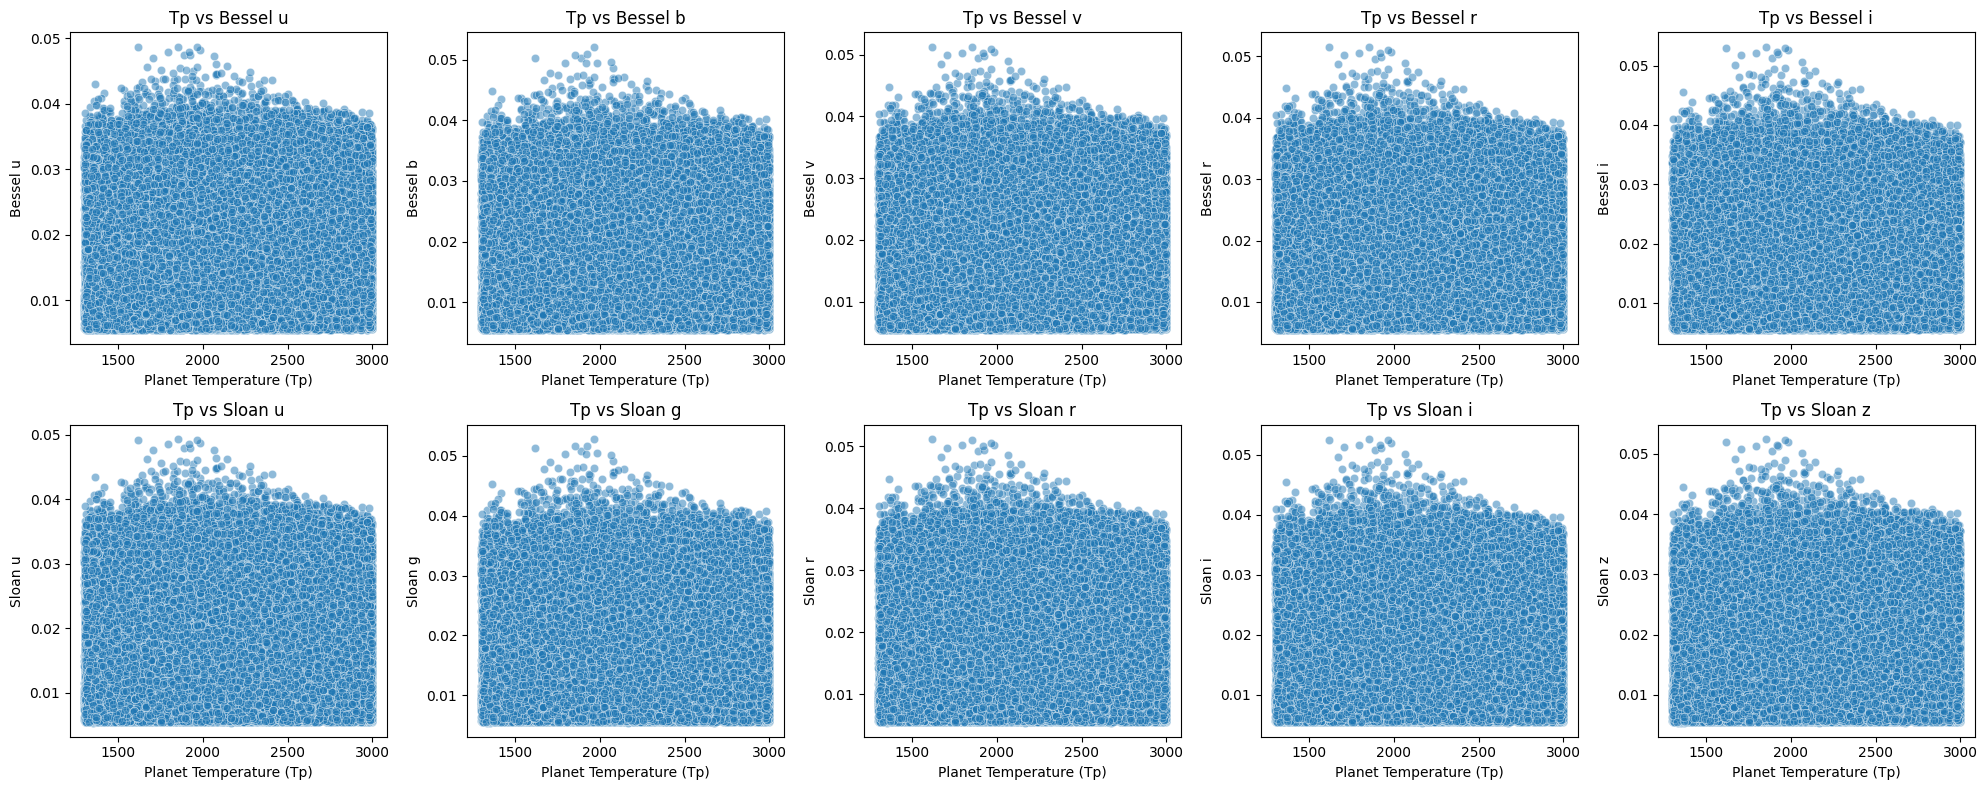

In [14]:
# พล็อตความสัมพันธ์ระหว่าง Tp และ transit depth ในแต่ละฟิลเตอร์
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, col in enumerate(transit_depth_cols):
    sns.scatterplot(x=data_clean['Tp'], y=data_clean[col], ax=axes[idx], alpha=0.5)
    axes[idx].set_xlabel('Planet Temperature (Tp)')
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'Tp vs {col}')

plt.tight_layout()
plt.show()


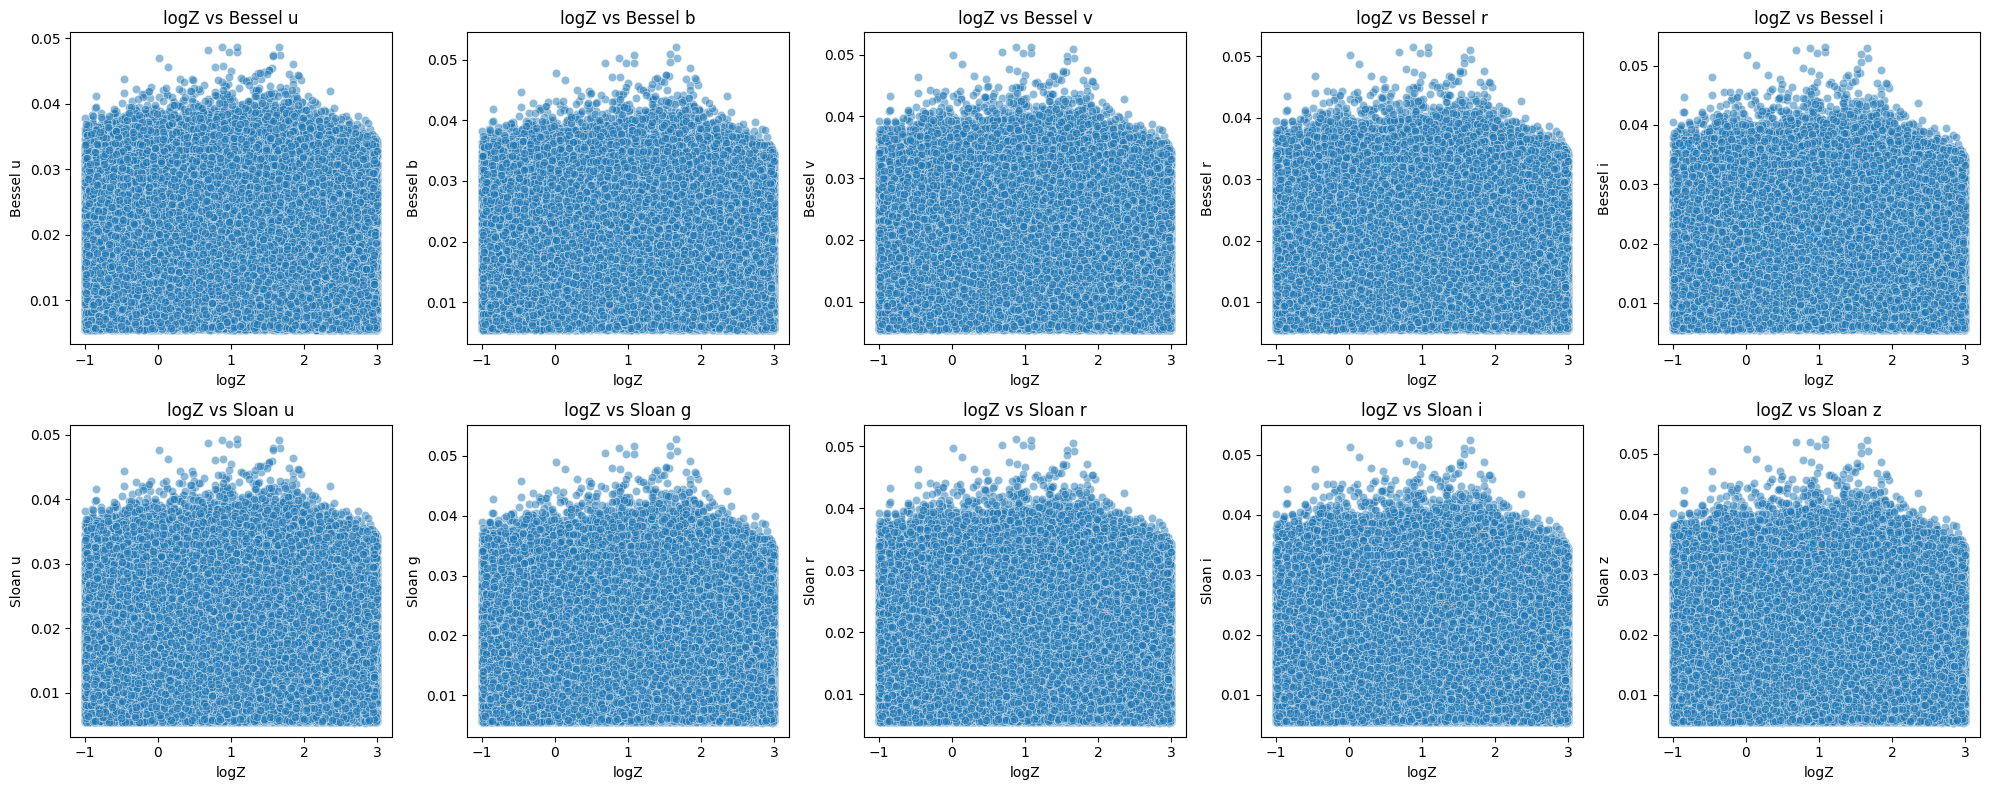

In [15]:
# พล็อตความสัมพันธ์ระหว่าง logZ และ transit depth ในแต่ละฟิลเตอร์
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for idx, col in enumerate(transit_depth_cols):
    sns.scatterplot(x=data_clean['logZ'], y=data_clean[col], ax=axes[idx], alpha=0.5)
    axes[idx].set_xlabel('logZ')
    axes[idx].set_ylabel(col)
    axes[idx].set_title(f'logZ vs {col}')

plt.tight_layout()
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# คำนวณ VIF สำหรับฟีเจอร์
X_features = data_clean[transit_depth_cols]
vif_data = pd.DataFrame()
vif_data['feature'] = X_features.columns
vif_data['VIF'] = [variance_inflation_factor(X_features.values, i) for i in range(len(X_features.columns))]

print(vif_data)


    feature           VIF
0  Bessel u  1.107663e+07
1  Bessel b  6.474866e+06
2  Bessel v  8.544422e+06
3  Bessel r  2.671181e+08
4  Bessel i  8.539058e+06
5   Sloan u  1.395161e+07
6   Sloan g  1.014040e+07
7   Sloan r  1.894533e+08
8   Sloan i  3.040187e+07
9   Sloan z  1.199775e+06


Explained Variance Ratio: [9.99861365e-01 8.41422885e-05 4.63647457e-05 4.24815473e-06
 3.08388130e-06 6.92408462e-07 4.84728543e-08 3.02086668e-08
 2.33937124e-08 1.06101326e-09]


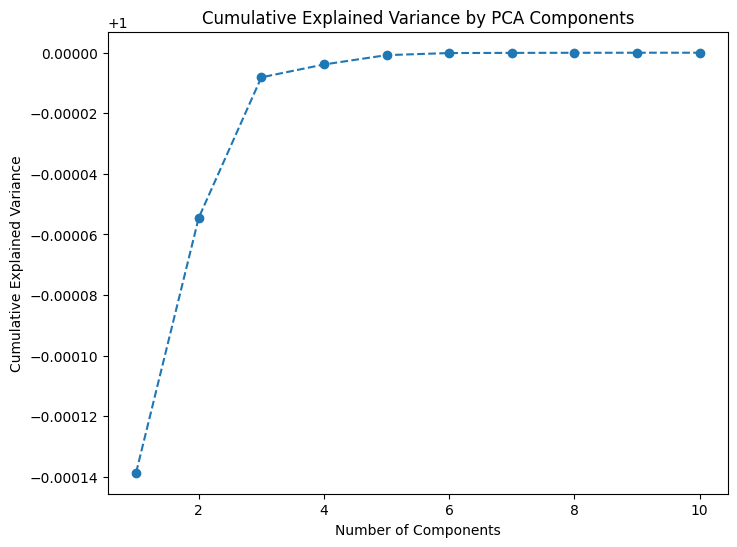

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# มาตรฐานข้อมูลก่อนทำ PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# ทำ PCA โดยรักษาองค์ประกอบหลักทั้งหมด
pca = PCA()
pca.fit(X_scaled)

# สัดส่วนความแปรปรวนที่อธิบายได้โดยแต่ละองค์ประกอบหลัก
explained_variance = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance)

# พล็อต Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


#train

In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requiremen

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [ ]:
# Features: Transit Depth
transit_depth_cols = ['Bessel u', 'Bessel b', 'Bessel v', 'Bessel r', 'Bessel i',
                      'Sloan u', 'Sloan g', 'Sloan r', 'Sloan i', 'Sloan z']
X = data_clean[transit_depth_cols]

# Targets: ตัวแปรของดาวเคราะห์
targets = ['Mp', 'Rp', 'Tp', 'logZ', 'C/O']

# รวม Features และ Target เข้าด้วยกันสำหรับ AutoGluon
data_autogluon = data_clean[transit_depth_cols + targets]


In [ ]:
from sklearn.model_selection import train_test_split

# สร้าง DataFrame สำหรับเก็บผลลัพธ์
results_autogluon = pd.DataFrame(columns=['Target', 'MAE', 'RMSE', 'R2_Score'])

# เราจะใช้วิธีการแบ่งข้อมูลสำหรับแต่ละตัวแปรเป้าหมาย


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from autogluon.tabular import TabularPredictor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import os

# Assuming you have a DataFrame to store results
results_autogluon = pd.DataFrame(columns=['Target', 'MAE', 'RMSE', 'R2_Score'])

# Dictionary to store predictors for each target
predictors = {}

for target in targets:
    print(f'=== Training model for {target} ===')

    # Split the data for each target variable
    train_data, test_data = train_test_split(data_autogluon, test_size=0.2, random_state=42)

    # Define the path where the model will be saved
    model_dir = f'/content/drive/MyDrive/nasa_models/{target}'

    # Create TabularPredictor for the target variable with specified 'path'
    predictor = TabularPredictor(label=target, eval_metric='rmse', path=model_dir).fit(
        train_data=train_data,
        time_limit=600  # Limit training time to 10 minutes per model (adjust as needed)
    )

    # Store the predictor in the dictionary
    predictors[target] = predictor

    # Predict on the test set
    y_pred = predictor.predict(test_data)
    y_true = test_data[target]

    # Calculate accuracy metrics
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)

    # Store the results using pd.concat()
    result_row = pd.DataFrame({'Target': [target], 'MAE': [mae], 'RMSE': [rmse], 'R2_Score': [r2]})
    results_autogluon = pd.concat([results_autogluon, result_row], ignore_index=True)

    # Display results
    print(f'MAE for {target}: {mae}')
    print(f'RMSE for {target}: {rmse}')
    print(f'R^2 Score for {target}: {r2}')
    print('--------------------------------\n')

# Optionally, save the results DataFrame to Google Drive
results_path = '/content/drive/MyDrive/nasa_models/results_autogluon.csv'
results_autogluon.to_csv(results_path, index=False)


In [ ]:
for target, predictor in predictors.items():
    # Define the path where the model will be saved
    model_path = f'models/{target}'

    # Explicitly save the predictor to the specified path
    predictor.save(model_path)

# Now results_autogluon will have all your results

In [ ]:
import matplotlib.pyplot as pltfor target in targets:    # โหลดโมเดลที่ฝึกสอนไว้    predictor = TabularPredictor.load(f'models/{target}')        # ทำนายค่าบนชุดทดสอบ    y_pred = predictor.predict(test_data)    y_true = test_data[target]        # พล็อตกราฟ    plt.figure(figsize=(8, 6))    plt.scatter(y_true, y_pred, alpha=0.5)    plt.xlabel(f'Actual {target}')    plt.ylabel(f'Predicted {target}')    plt.title(f'Actual vs Predicted for {target}')    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')    plt.show()